<a href="https://colab.research.google.com/github/MohdSajid01/SeolBikeData/blob/main/SeolBikeData(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',50000)
pd.set_option('display.max_columns',500)
import plotly.express  as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
df=pd.read_csv('/content/SeoulBikeData.csv',encoding='unicode_escape')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no null value present in the data.

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df['Date'].unique()

array(['01/12/2017', '02/12/2017', '03/12/2017', '04/12/2017',
       '05/12/2017', '06/12/2017', '07/12/2017', '08/12/2017',
       '09/12/2017', '10/12/2017', '11/12/2017', '12/12/2017',
       '13/12/2017', '14/12/2017', '15/12/2017', '16/12/2017',
       '17/12/2017', '18/12/2017', '19/12/2017', '20/12/2017',
       '21/12/2017', '22/12/2017', '23/12/2017', '24/12/2017',
       '25/12/2017', '26/12/2017', '27/12/2017', '28/12/2017',
       '29/12/2017', '30/12/2017', '31/12/2017', '01/01/2018',
       '02/01/2018', '03/01/2018', '04/01/2018', '05/01/2018',
       '06/01/2018', '07/01/2018', '08/01/2018', '09/01/2018',
       '10/01/2018', '11/01/2018', '12/01/2018', '13/01/2018',
       '14/01/2018', '15/01/2018', '16/01/2018', '17/01/2018',
       '18/01/2018', '19/01/2018', '20/01/2018', '21/01/2018',
       '22/01/2018', '23/01/2018', '24/01/2018', '25/01/2018',
       '26/01/2018', '27/01/2018', '28/01/2018', '29/01/2018',
       '30/01/2018', '31/01/2018', '01/02/2018', '02/02

In [ ]:
df['day']=pd.DatetimeIndex(df['Date']).day
df['month']=pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
df.drop(columns='Date',inplace=True)

<ipython-input-8-bb6bf6c04d80>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['day']=pd.DatetimeIndex(df['Date']).day
<ipython-input-8-bb6bf6c04d80>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['month']=pd.DatetimeIndex(df['Date']).month
<ipython-input-8-bb6bf6c04d80>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['year'] = pd.DatetimeIndex(df['Date']).year


In [ ]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


EDA(exploratory data analysis)

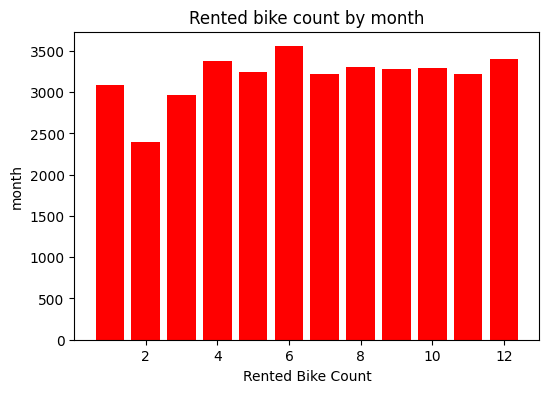

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(df['month'],df['Rented Bike Count'],color='r')
plt.xlabel('Rented Bike Count')
plt.ylabel('month')
plt.title('Rented bike count by month')
plt.show()

In [ ]:
year=df.groupby('year')['Rented Bike Count'].count().reset_index(name='count of Rented Bike Count')
year

,year,count of Rented Bike Count
0,2017,744
1,2018,8016


In [ ]:
df['year'].unique()

array([2017, 2018])

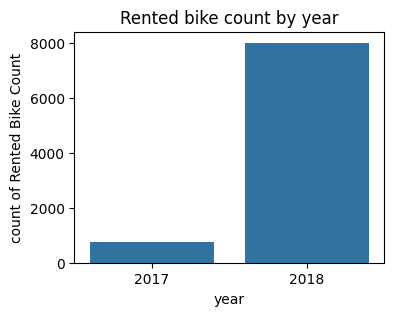

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(data=year,x='year',y='count of Rented Bike Count')
plt.xlabel('year')
plt.ylabel('count of Rented Bike Count')
plt.title('Rented bike count by year')
plt.show()

In [ ]:
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

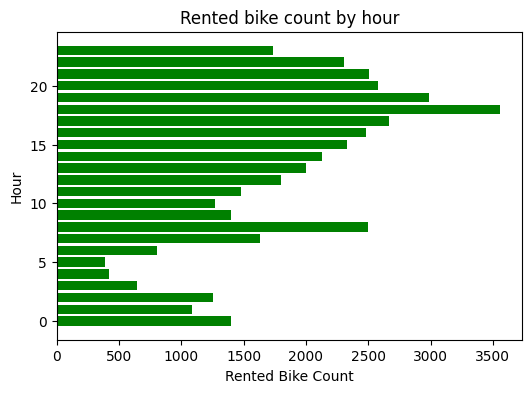

In [ ]:
plt.figure(figsize=(6,4))
plt.barh(df['Hour'],df['Rented Bike Count'],color='g')
plt.xlabel('Rented Bike Count')
plt.ylabel('Hour')
plt.title('Rented bike count by hour')
plt.show()

3500 bikes were given on rent for 18 hours.

In [ ]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
seasons=df.groupby('Seasons')['Rented Bike Count'].sum().reset_index(name='Rented Bike Count')
seasons

,Seasons,Rented Bike Count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


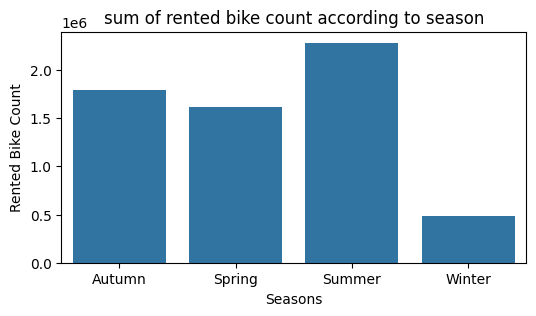

In [ ]:
plt.figure(figsize=(6,3))
sns.barplot(data =seasons, x ='Seasons',y='Rented Bike Count')
plt.xlabel('Seasons')
plt.title('sum of rented bike count according to season');
plt.show()

most of the bike given in summer season.

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
df.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


In [ ]:
df['Rainfall(mm)'].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  0.9,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,
        8. , 17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

<ipython-input-22-840d5b3ce661>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =df, x = 'Holiday', palette = 'Dark2')


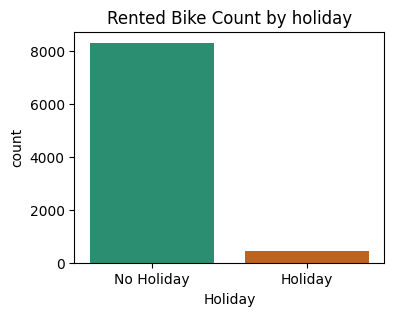

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data =df, x = 'Holiday', palette = 'Dark2')
plt.xlabel('Holiday')
plt.title('Rented Bike Count by holiday');

here we see that 8000 of people use bike on working days.

<ipython-input-23-b582648b7d9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data =df, x = 'Functioning Day', palette = 'Dark2')


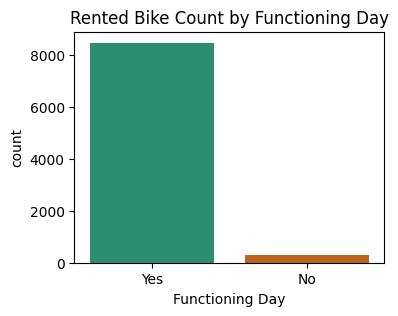

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(data =df, x = 'Functioning Day', palette = 'Dark2')
plt.xlabel('Functioning Day')
plt.title('Rented Bike Count by Functioning Day');

8500 people use bike on functioning day.

In [ ]:
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017


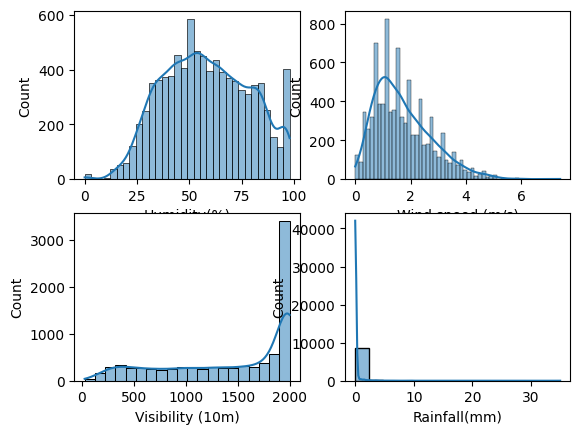

<Figure size 1000x600 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2,2)
plt.figure(figsize=(10,6))
#create boxplot in each subplot
sns.histplot(df['Humidity(%)'], kde = True, ax=axes[0,0])

sns.histplot(df['Wind speed (m/s)'], kde = True, ax=axes[0,1])

sns.histplot(df['Visibility (10m)'], kde = True, ax=axes[1,0])

sns.histplot(df['Rainfall(mm)'], kde = True, ax=axes[1,1])
plt.show()

<Figure size 600x400 with 0 Axes>

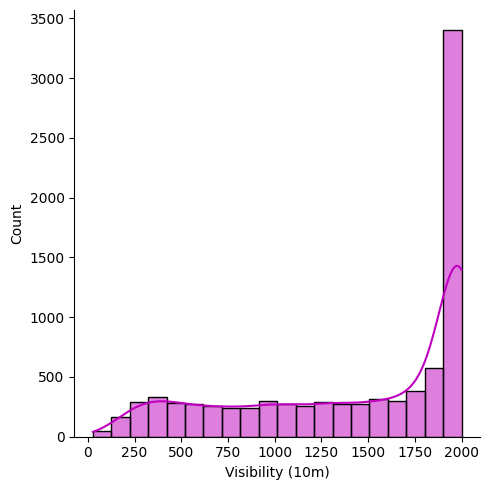

In [ ]:
#Visibility (10m)
plt.figure(figsize=(6,4))
sns.displot(df['Visibility (10m)'], kde = True, color = 'm')
plt.show()

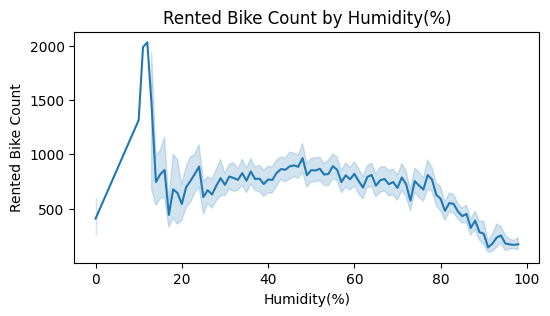

In [ ]:
plt.figure(figsize=(6,3))
sns.lineplot(data =df, x = 'Humidity(%)',y='Rented Bike Count')
plt.xlabel('Humidity(%)')
plt.title('Rented Bike Count by Humidity(%)');

most of the bikes were rented when humidity was lie between (0% to 20%).

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Seasons']=label.fit_transform(df['Seasons'])
df=pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,day,month,year,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,12,1,2017,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,12,1,2017,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,12,1,2017,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,12,1,2017,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,12,1,2017,1,1


**labelencoding in 'Seasons'**

Autumn=0
spring=1
summer=2
winter=3

**'Holiday'**

holiday=0
no holiday=1

**'Functioning day'**

NO=0
Yes=1

splitting the data into dependent and independent variable

In [ ]:
x = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

In [ ]:
#x=x.reshape(1,-1)



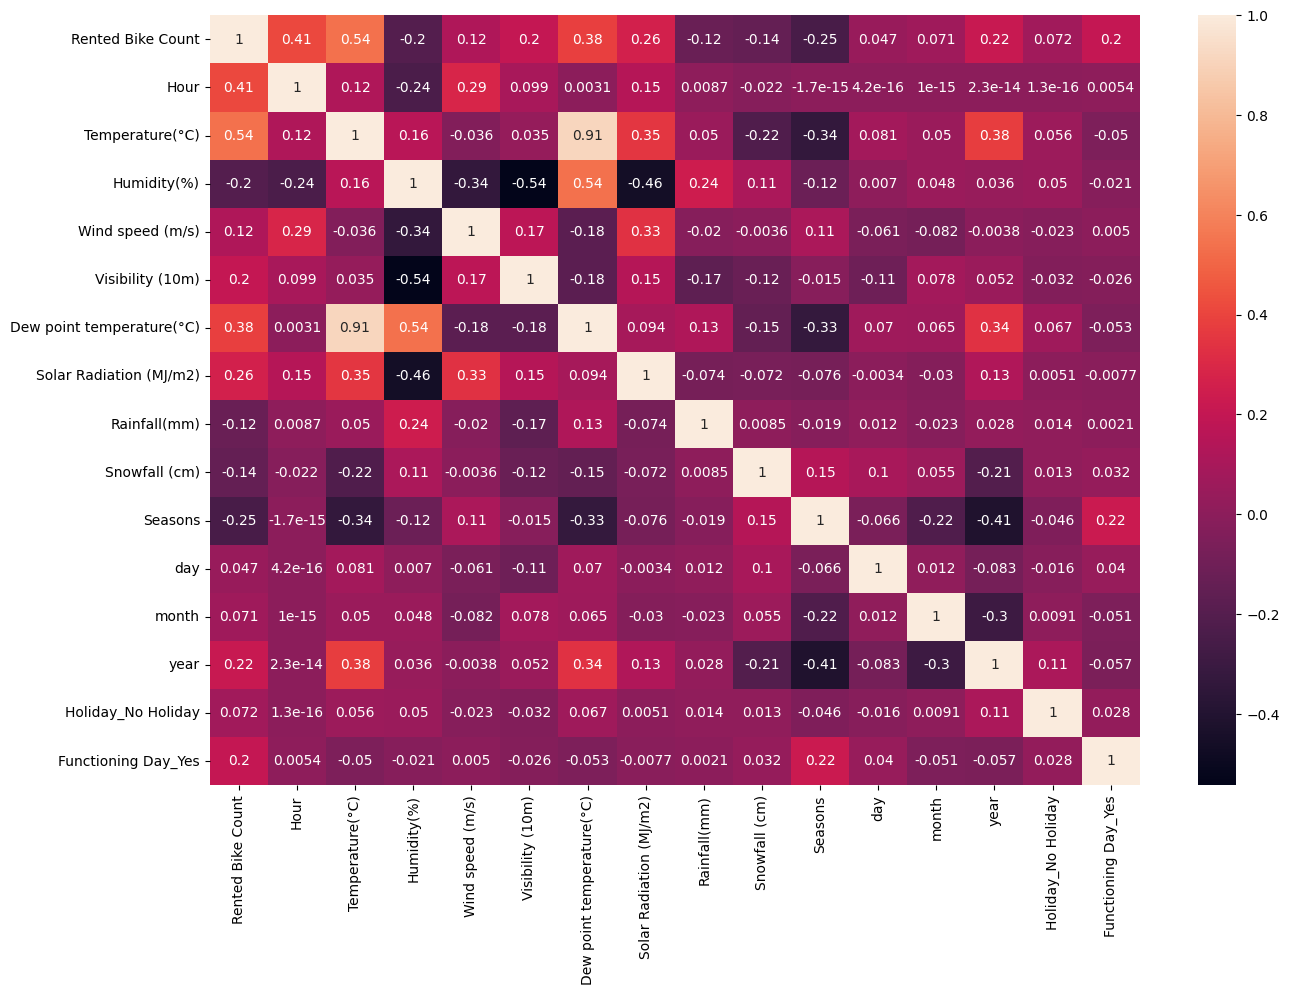

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,day,month,year,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,12,1,2017,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,12,1,2017,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,12,1,2017,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,12,1,2017,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,12,1,2017,1,1


splitting the data into train and test.

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)



In [ ]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8760, 16)
(7008, 15)
(1752, 15)
(7008,)
(1752,)


In [ ]:
x_train

array([[0.65217391, 0.54195804, 0.62244898, ..., 1.        , 1.        ,
        1.        ],
       [0.39130435, 0.71153846, 0.87755102, ..., 1.        , 1.        ,
        1.        ],
       [0.82608696, 0.50699301, 0.46938776, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.60869565, 0.82692308, 0.63265306, ..., 1.        , 1.        ,
        1.        ],
       [0.86956522, 0.25174825, 0.52040816, ..., 1.        , 1.        ,
        1.        ],
       [0.95652174, 0.6486014 , 0.56122449, ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
y_train

8415     995
5049    1195
8395    1448
1535     178
5518    1980
5064    1275
8089       0
3653      76
4414    1969
1222     232
3933    1571
1315     211
7970     184
6679    1487
1465      96
3813    1513
3997     151
2407     119
1744     175
7820    1593
4656    1274
4080     986
1550     196
3470     942
6747     504
8698     583
7969     326
1739     155
6399     405
8245       0
1650     448
73       186
3995     243
6333    2057
3688     911
1934     373
5048    2028
6829    1102
3328    1346
4967    1437
3936     581
4927     369
7691     961
1126     321
2670     212
7762     997
1203     118
6178     547
3914     189
8348    1208
8697     798
6055    1027
2183     190
286      256
31       146
4789     938
4466     448
582       59
6850     923
5095      25
168      233
2922    1296
3314     260
8339     789
5349    1936
5610    1212
7779     342
4379    1036
3024      56
4988     199
4371     366
805      279
3053      57
7719    1203
6127    1065
3265     226
1153     190

## **LinearRegression**

In [ ]:
#implementation of model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [ ]:
regressor.intercept_

-824.6621874553327

In [ ]:
regressor.coef_

array([  640.01534856,  1090.68844998, -1034.27312959,   130.0695042 ,
          35.20683377,   657.62587774,  -288.67473687, -2119.51101691,
         254.17550084,  -315.55734983,   -37.07309266,    37.54373806,
         -62.00082094,   137.71208611,   954.82986967])

In [ ]:
# prediction of the data
y_pred_train=regressor.predict(x_train)

In [ ]:
y_pred_train

array([ 996.70304486,  653.70161949, 1206.63942   , ..., 1164.75716688,
        450.97062713, 1443.65946357])

In [ ]:
y_train.head()

8415     995
5049    1195
8395    1448
1535     178
5518    1980
Name: Rented Bike Count, dtype: int64

In [ ]:
y_pred_test=regressor.predict(x_test)

In [ ]:
y_test.head()

6056    1728
5556     822
5990     658
7674    2716
3319    1083
Name: Rented Bike Count, dtype: int64

In [ ]:
y_pred_test

array([1010.75771178, 1176.10362013, 1419.24710223, ...,  973.98224161,
       -186.0245547 , 1385.99075484])

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_pred_train)*100)
print(r2_score(y_test,y_pred_test)*100)

55.46607200095595
53.087525973651836


### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
y_pred4 = decision_tree.predict(x_test)
acc_4 =r2_score(y_test, y_pred4)
score4 = round(acc_4*100,2)
#print(Regression_report(y_test,y_pred))

print('The accuracy score of Decision tree is {}%'.format(score4))

The accuracy score of Decision tree is 75.16%


## **Bagging Regressor**

In [ ]:
# import machine learning model for prediction
import xgboost as xgb

# import bagging model
from sklearn.ensemble import BaggingRegressor

In [ ]:
# initializing the bagging model usiing Xgboost as base model with default parameter
xgb_XGBRegressor = xgboost.XGBRegressor()
model = BaggingRegressor(base_estimator=xgb_XGBRegressor, n_estimators=10)

# training model
model.fit(x_train, y_train)

# prediction output on test data
pred=model.predict(x_test)
print(pred)
print(r2_score(y_test,pred)*100)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[1635.4944   712.5511   705.7828  ...  275.70255  239.84383  690.76013]
88.68434012326908


## **KNN(K Nearest Neighbour)**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 21)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)
pred

# Evaluate the model
from sklearn.metrics import accuracy_score
print(r2_score(y_test, pred)*100)



70.24149760230071


## **GradientBoostingRegressor**

In [ ]:
# importing machine learning models for prediction
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
# initializing the boosting module with default parameters
model = GradientBoostingRegressor()


In [ ]:
# training the model on the train dataset
model.fit(x_train, y_train)


GradientBoostingRegressor()

In [ ]:
# predicting the output on the test dataset
pred_final = model.predict(x_test)


In [ ]:
# printing the root mean squared error between real value and predicted value
print(r2_score(y_test, pred_final))

0.832356077193763
